### Entanglement

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

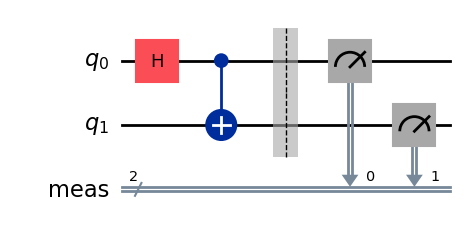

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw("mpl", style="iqp")

In [3]:
sim = AerSimulator()
compiled = transpile(qc, sim)
job = sim.run(compiled, shots=500)
result = job.result()
counts = result.get_counts()
print("Raw counts:", counts)

Raw counts: {'00': 255, '11': 245}


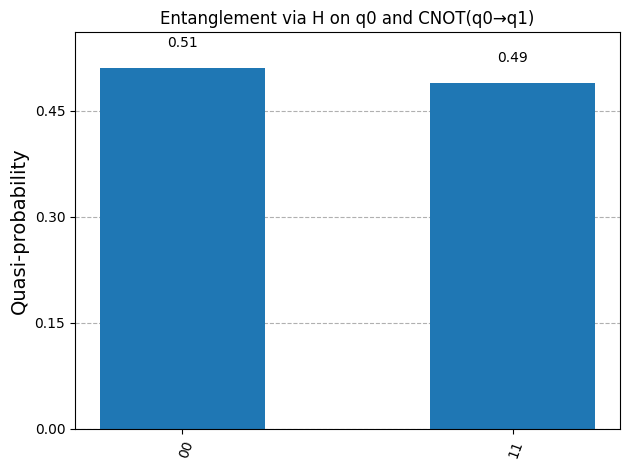

In [4]:
shots = sum(counts.values())
probs = {bit: round(val / shots, 3) for bit, val in counts.items()}
plot_histogram(probs, title="Entanglement via H on q0 and CNOT(q0→q1)")